# Problem Definition
## Based on the given we need to predict if a patient has heart disease or not

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#importing sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#import evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
# Data loading
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

# Data Analysis

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
# counting values in target column
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

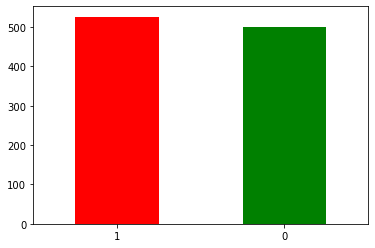

In [7]:
# counting values in target column and ploting
df['target'].value_counts().plot(kind ='bar', color=['red','green'])
plt.xticks(rotation=0);

In [8]:
# checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# description
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [11]:
# comapring sex and target columns
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


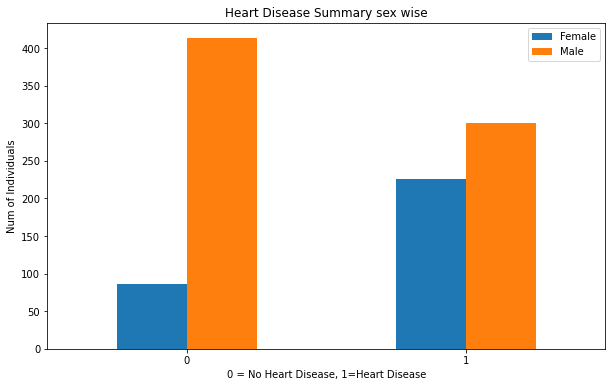

In [12]:
# ploting
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6))
plt.title('Heart Disease Summary sex wise')
plt.xlabel('0 = No Heart Disease, 1=Heart Disease')
plt.ylabel('Num of Individuals')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [13]:
df.thalach.value_counts()

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

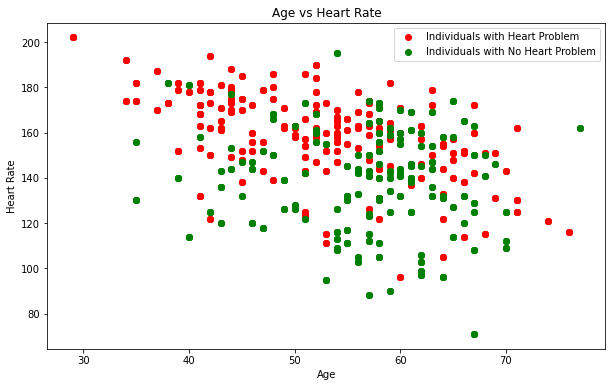

In [14]:
# Finding Patterns Using Scatter plot
plt.figure(figsize=(10,6))
# creating scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='green')
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['Individuals with Heart Problem','Individuals with No Heart Problem']);


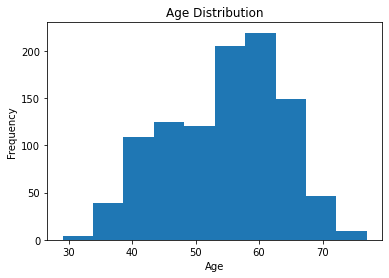

In [15]:
# Creating Histogram to see Age Distribution
df.age.plot.hist()
plt.title('Age Distribution')
plt.xlabel('Age');

In [16]:
# Chest Pain type relation with heart disease
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [17]:
# showing relation between cp and target columns using crosstab
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


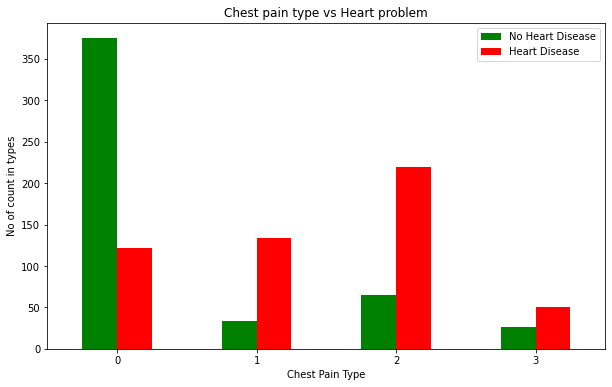

In [18]:
pd.crosstab(df.cp,df.target).plot(figsize=(10,6),kind='bar',
                                  color=['green','red'])
plt.title('Chest pain type vs Heart problem')
plt.xlabel('Chest Pain Type')
plt.ylabel('No of count in types')
plt.legend(['No Heart Disease','Heart Disease'])
plt.xticks(rotation=0);

# Correlation Matix

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [20]:
# Correlation between cp and thalach
df['cp'].corr(df['thalach'])

0.3068392821874802

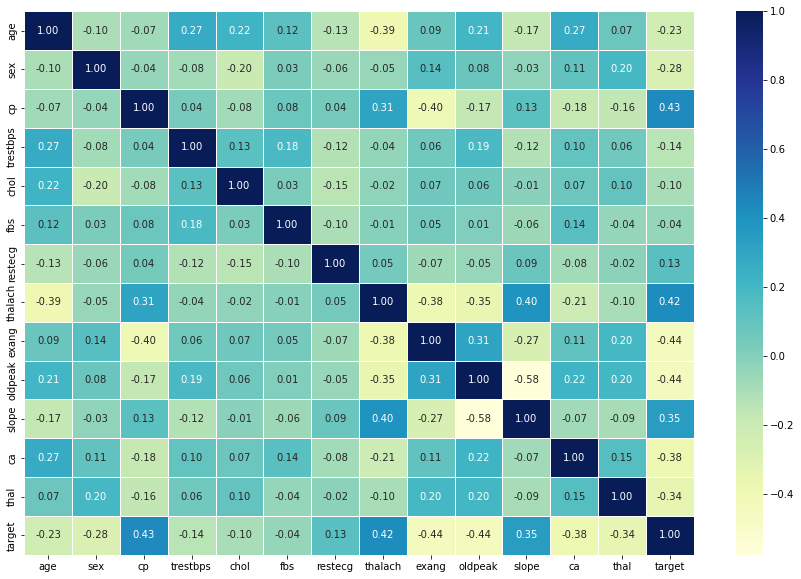

In [21]:
# drawing correlation map
cor_map = df.corr()
fig,cor_plot = plt.subplots(figsize=(15,10))
cor_plot = sns.heatmap(cor_map,
                      annot=True,
                      linewidths=0.5,
                      fmt='0.2f',
                      cmap='YlGnBu')

# Modelling 

In [22]:
# spliting data into test and train
x = df.drop('target', axis=1)
y = df['target']

In [23]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [24]:
y.tail()

1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [26]:
len(df)

1025

In [27]:
x_train.shape,y_train.shape

((820, 13), (820,))

In [28]:
x_test.shape,y_test.shape

((205, 13), (205,))

# Models to use
## 1- K-Nearest neighbors classifier
## 2- Random Forest Classifier
## 3- Logistic regression


In [29]:
# initiate the models in a dictionary
models = {'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier(),
         'Logistic Regression':LogisticRegression()}
# creating function to evaluate the models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(7)
    #Dictionary to store the score
    model_score = {}
    #looping through
    for name,model in models.items():
        model.fit(x_train,y_train)
        #evaulating model and append its score
        model_score[name] = model.score(x_test,y_test)
    return model_score
    

In [30]:
models_score = fit_and_score(models =models,
                            x_train = x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)

C:\Users\Muhammad israr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
models_score

{'KNN': 0.7365853658536585,
 'Random Forest': 1.0,
 'Logistic Regression': 0.8829268292682927}

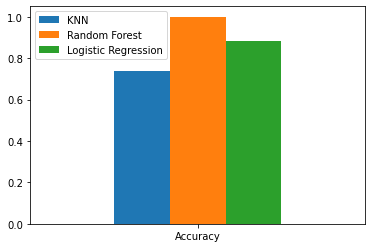

In [32]:
models_compare = pd.DataFrame(models_score,index=['Accuracy'])
models_compare.plot.bar()
plt.xticks(rotation=0);

# KNN Model Tuning

In [33]:
# empty lists to store to score
train_score = []
test_score = []
# creating range for nneighbors
nneighbors = range(1,30)
#initate knn 
KNN = KNeighborsClassifier()
#loop through nneighbors
for i in nneighbors:
    KNN.set_params(n_neighbors = i)
    #run the fit for every ith value
    KNN.fit(x_train,y_train)
    #update the training_score list
    train_score.append(KNN.score(x_train,y_train))
    #update the test score list
    test_score.append(KNN.score(x_test,y_test))
    

In [34]:
train_score

[1.0,
 0.9939024390243902,
 0.9902439024390244,
 0.9524390243902439,
 0.9121951219512195,
 0.8268292682926829,
 0.8097560975609757,
 0.7951219512195122,
 0.7597560975609756,
 0.7548780487804878,
 0.7609756097560976,
 0.7524390243902439,
 0.7426829268292683,
 0.748780487804878,
 0.7353658536585366,
 0.75,
 0.748780487804878,
 0.7634146341463415,
 0.7524390243902439,
 0.7402439024390244,
 0.7353658536585366,
 0.725609756097561,
 0.7268292682926829,
 0.7390243902439024,
 0.7560975609756098,
 0.7560975609756098,
 0.75,
 0.7353658536585366,
 0.7304878048780488]

In [35]:
test_score

[1.0,
 0.9512195121951219,
 0.9170731707317074,
 0.848780487804878,
 0.7365853658536585,
 0.7707317073170732,
 0.7707317073170732,
 0.7707317073170732,
 0.7853658536585366,
 0.7707317073170732,
 0.7609756097560976,
 0.7609756097560976,
 0.7414634146341463,
 0.7658536585365854,
 0.751219512195122,
 0.751219512195122,
 0.7219512195121951,
 0.7268292682926829,
 0.7121951219512195,
 0.7170731707317073,
 0.7024390243902439,
 0.7073170731707317,
 0.7073170731707317,
 0.7317073170731707,
 0.7414634146341463,
 0.7463414634146341,
 0.7414634146341463,
 0.7317073170731707,
 0.7170731707317073]

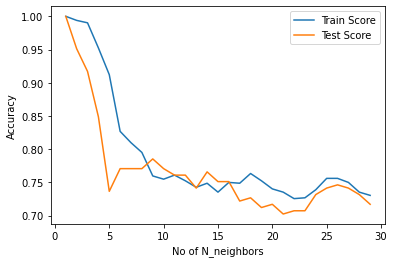

In [36]:
plt.plot(nneighbors,train_score, label='Train Score', )
plt.plot(nneighbors,test_score, label='Test Score')
plt.xlabel('No of N_neighbors')
plt.ylabel('Accuracy')
plt.legend();

In [37]:
print(f'Max accuracy score {max(test_score)}')

Max accuracy score 1.0


# Randomized Search CV Tuning

In [38]:
# Creating dictionary for logistic regression hyperparamters tuning
LR_hp ={'C':np.logspace(-4,4,20),
       'solver':['liblinear']}
# Creating dictionary for Random forest classifier hyperparamters tuning
RFC_hp = {'n_estimators':np.arange(10,1600,100),
         'max_depth':[None,3,5,6,10],
         'min_samples_split':np.arange(2,20,2),
         'min_samples_leaf':np.arange(1,20,2)}

In [39]:
# Tune Logistic Regression
np.random.seed(7)
lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv=5,
                       n_iter=20,
                       verbose=True)
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
lr.score(x_test,y_test)

0.8829268292682927

In [41]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
# Tune Random Forest Classifier
np.random.seed(7)
rfc = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=RFC_hp,
                       cv=5,
                       n_iter=20,
                       verbose=True)
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [43]:
rfc.score(x_test,y_test)

0.9463414634146341

In [44]:
rfc.best_params_

{'n_estimators': 610,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 10}

# Tuning using Grid Search CV

In [45]:
gscv_lr = GridSearchCV(LogisticRegression(),
                      param_grid=LR_hp,
                      cv=5,
                      verbose=True)
gscv_lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
gscv_lr.score(x_test,y_test)

0.8829268292682927

In [47]:
gscv_lr.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [48]:
# Creating dictionary for Random forest classifier hyperparamters tuning
RFC_hp = {'n_estimators':np.arange(10,600,100),
         'max_depth':[None,3,5,6,10],
         'min_samples_split':[2,4,5],
         'min_samples_leaf':[1,2,3]}

In [49]:
clf= RandomForestClassifier(n_jobs=1)

In [50]:
gscv_rfc = GridSearchCV(RandomForestClassifier(n_jobs=1),
                       param_grid=RFC_hp,
                       cv=5,
                       verbose=True)


In [51]:
gscv_rfc.fit(x_train,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 3, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': array([ 10, 110, 210, 310, 410, 510])},
             verbose=True)

In [52]:
gscv_rfc.score(x_test,y_test)

1.0

In [53]:
gscv_rfc.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 210}

# Plotting Area Under the Curve (AUC)

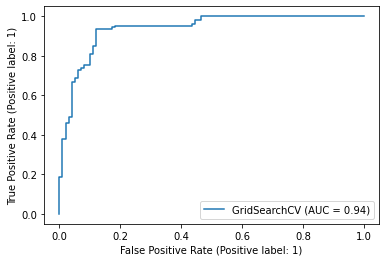

In [54]:
plot_roc_curve(gscv_lr,x_test,y_test);


# confusion matrix

In [55]:
y_preds = gscv_lr.predict(x_test)
print(confusion_matrix(y_test,y_preds))

[[82 17]
 [ 7 99]]


In [56]:
# ploting confusion matrix
sns.set(font_scale=1.5)

def plot_confusion(y_test,y_preds):
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.title('Confusion Matrix')

    
    

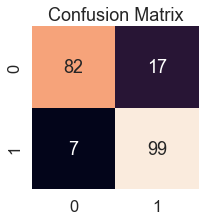

In [57]:
plot_confusion(y_test,y_preds)

# Ploting classification report

In [58]:
print(classification_report(y_test,y_preds))


              precision    recall  f1-score   support

           0       0.92      0.83      0.87        99
           1       0.85      0.93      0.89       106

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



# calculating cross validation report for logistic regression


In [59]:
gscv_lr.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [60]:
log_regression = LogisticRegression(C=0.23357214690901212,
                                   solver='liblinear')

In [61]:
cv_accuracy = cross_val_score(log_regression,
                             x,
                             y,
                             cv=5,
                             scoring='accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8439024390243903

In [62]:
cv_precision = cross_val_score(log_regression,
                             x,
                             y,
                             cv=5,
                             scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8145780021766604

In [63]:
cv_recall = cross_val_score(log_regression,
                             x,
                             y,
                             cv=5,
                             scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9012219227313567

In [64]:
cv_f1 = cross_val_score(log_regression,
                             x,
                             y,
                             cv=5,
                             scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8556904806073892

# ploting cross validation score

In [65]:
cv_plot = pd.DataFrame({'Accuracy':cv_accuracy,
                       'Precision':cv_precision,
                       'Recall':cv_recall,
                       'F1_score':cv_f1},index=[0])

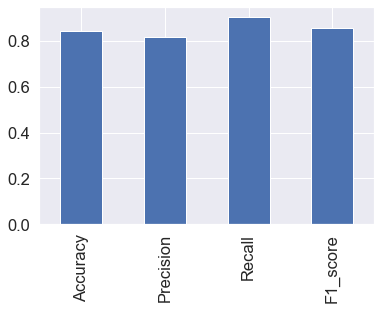

In [66]:
cv_plot.T.plot.bar(legend=False);

# Features improvement

In [67]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [68]:
log_regression.fit(x_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [69]:
log_regression.coef_

array([[ 0.00947732, -1.28920009,  0.75239351, -0.01254298, -0.00482773,
        -0.25648071,  0.4337778 ,  0.02747844, -0.65380098, -0.57087034,
         0.51314794, -0.69962613, -0.68983181]])

In [70]:
final_coef = dict(zip(df.columns,list(log_regression.coef_[0])))

In [71]:
final_coef

{'age': 0.009477319633573403,
 'sex': -1.2892000875271155,
 'cp': 0.7523935127717682,
 'trestbps': -0.012542983819377922,
 'chol': -0.004827728111832869,
 'fbs': -0.2564807093058814,
 'restecg': 0.43377780300314317,
 'thalach': 0.027478441346382877,
 'exang': -0.6538009772354533,
 'oldpeak': -0.5708703448404173,
 'slope': 0.5131479404656298,
 'ca': -0.6996261317467658,
 'thal': -0.6898318065777075}

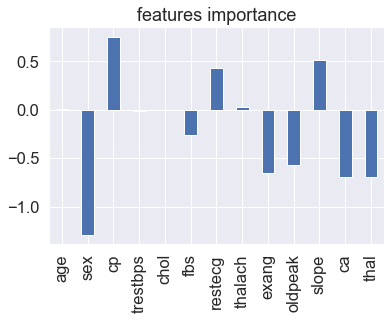

In [72]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title='features importance',legend=False);